# 基因组组装

exprmat 数据库自带了人类和小鼠的几个参考基因组组装，并提供了一个可组合的基因组轨道可视化函数集

In [1]:
from exprmat.plotting.track import (
    architecture,
    genes,
    initialize_tracks,
    genome_track,
    chromosome_track,
    gene_track,
    bed_track,
    coverage_track_from_bam,
    coverage_track_from_bigwig
)

### 基因组结构

我们指定组装名称和着色参数，可以绘制出我们数据库中携带的组装信息，在默认情况下，颜色参数有两个可以选用的值：

* `assembly`：使用组装信息着色，其中默认情况下，修订补丁（Fix Patches）被绘制成红色，新增补丁（Novel Patches）被绘制成蓝色，替代 Scaffold 被绘制成灰色，端粒被绘制成紫色，中心粒被绘制成绿色，性染色体拟常染色体区被绘制成橙色，Gap 被绘制成黑色
* `cytobands`：吉姆萨染色显带，中心粒被绘制成红色，可变染色区绘制成橙色，随体柄被绘制成黄色

染色体按照基因组大小排序

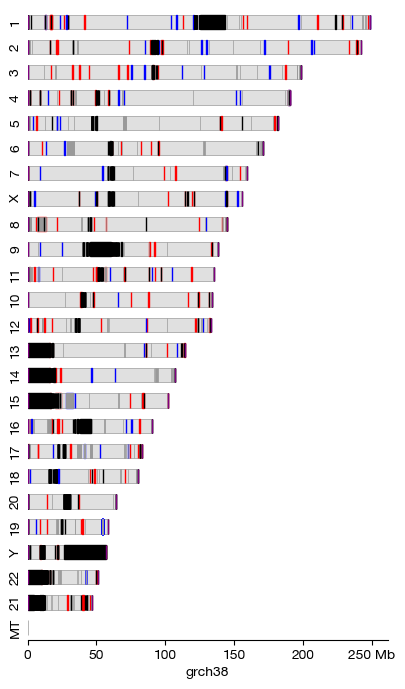

In [6]:
arch = architecture('grch38', cby = 'assembly', figsize = (4, 7))

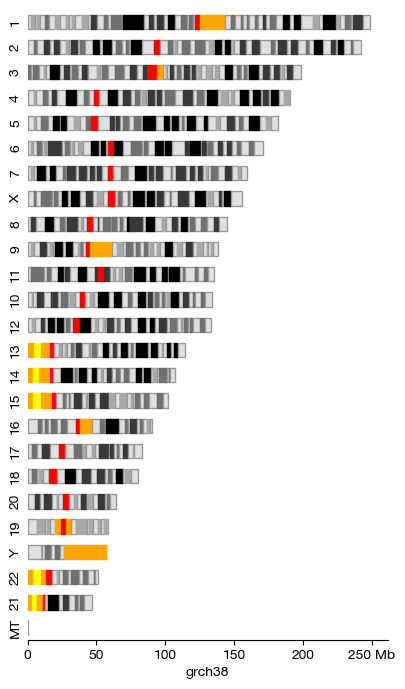

In [2]:
arch = architecture('grch38', cby = 'cytobands', figsize = (4, 7))

### 基因

指定染色体的区段，可以绘制出染色体上标注的基因，当展示基因数量超过 20 个时，绘制基因变得拥挤，因此
我们将省略基因的细节

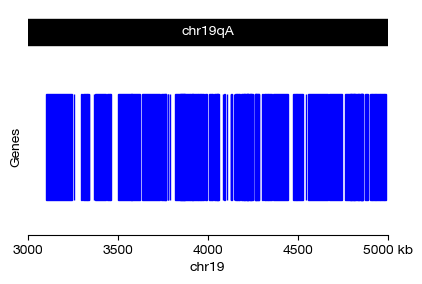

In [13]:
fig = genes(
    assembly = 'grcm39', 
    chr = 'chr19', 
    xfrom = 3e6, 
    xto = 5e6, 
    figsize = (4, 2.5)
)

当缩小范围时，基因结构显示出来，基因名后的括号时转录本数目，正链上的基因用绿色表示，反链上的基因用紫色表示

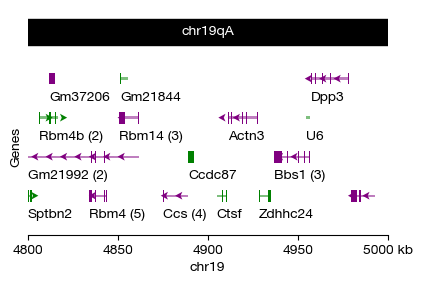

In [12]:
fig = genes(
    assembly = 'grcm39', 
    chr = 'chr19', 
    xfrom = 4800000, 
    xto = 5000000, 
    figsize = (4, 2.5)
)

### 自定义组合图

基因轨道（基因、BED）、覆盖率轨道（BAM、BIGWIG）和 染色体轨道可以自由组合成需要的图形

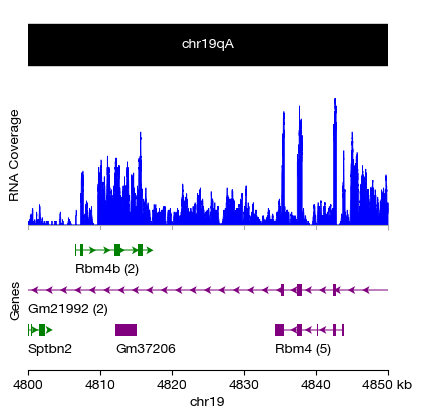

In [ ]:
# initialize tracks, contains three tracks, one chromosome title, one coverage and one gene track.
fig, axes, xticks, xticklabels, xfrom, xto = initialize_tracks(
    ntracks = 3, 
    xfrom = 4800000, xto = 4850000, heights = [0.2, 0.4, 0.4],
    figsize = (4, 4), dpi = 100, sequence_name = 'chr19'
)

# chromosome track on the first
_, _ = chromosome_track(
    axes[0], xfrom, xto, chr = 'chr19', assembly = 'grcm39', color = 'cytobands', 
    draw_label = (xfrom - xto) <= 25e6
)

# plot a bam coverage for a murine RNA-seq dataset on the second.
_ = genome_track(axes[1], ylabel = 'RNA Coverage')
# the reader of the bam file requires an existing bai index file.
_ = coverage_track_from_bam(
    ax = axes[1], bam = '/**/d1.sorted.bam',
    xfrom = xfrom, xto = xto, chrm = 'chr19', xticks = xticks
)

# plot genes track on the third.
# genome_track method sets the display options for a common track.
_ = genome_track(axes[2], ylabel = 'Genes')
_, gdf = gene_track(
    axes[2], xfrom, xto, chr = 'chr19', 
    assembly = 'grcm39', show_gene_name = True
)